### Malicious Website Analysis

* URL: it is the anonimous identification of the URL analyzed in the study
* URL_LENGTH: it is the number of characters in the URL
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
* CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
* APP_BYTES: this is the number of bytes transfered
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server
* REMOTE_APP_PACKETS: packets received from the server
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


__6 numerical and categorical variables below.__

__TYPE__: this is a categorical variable, its values represent the type of web page analyzed, specifically, 
1 is for malicious websites and 0 is for benign websites.

__URL_LENGTH__: it is the number of characters in the URL.

__CHARSET__: it is a categorical value and its meaning is the character encoding standard (also called character set).

__CONTENT_LENGTH__: it represents the content size of the HTTP header.

__APP_BYTES__: this is the number of bytes transfered

__SOURCE_APP_PACKETS__: packets sent from the honeypot to the server.

__REMOTE_APP_PACKETS__: packets received from the server.




In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Callable, List

class rawData:
    def __init__(self, filename):
        self.filename = filename
    @staticmethod    
    def validate(self):
        try:
            if self.filename.endswith('.csv') is True:
                return True
            else:
                return ("please make sure you have right file extension")
        except Exception as e:
               return e
    def readData(self):
        try:
            data = self.validate(self.filename)
            if(data):
                return pd.read_csv(self.filename)
            else:
                return ("your file is corrupted, please check your file")
        except Exception as e:
            return e
        
    
data = rawData('./dataset.csv')
init_dataFrame = pd.DataFrame(data.readData())


targetedVariables = pd.DataFrame(init_dataFrame[[
                                                "Type",
                                                "URL_LENGTH",
                                                "CHARSET",
                                                "CONTENT_LENGTH",
                                                "APP_BYTES",
                                                "SOURCE_APP_PACKETS",
                                                "REMOTE_APP_PACKETS"
                                                ]])



class AggregateFunctions:
    def __init__(self, data=None):
        self.data = data
    
    def isEmpty(self):
        return self.data.empty

    def getMean(self):
        if (self.isEmpty() == False):
            return(self.data.mean(axis=1))
            
    def getMedian(self):
        if (self.isEmpty() == False):
              return(self.data.median(axis=1))
            
    def getMin(self):
        if (self.isEmpty() == False):
              return(self.data.min(axis=1))
            
    def getMax(self):
        if (self.isEmpty() == False):
              return(self.data.max(axis=1))
            


ds = AggregateFunctions(init_dataFrame)
#Samples from raw dataset ; first 100 rows 
init_dataFrame.head(100)



,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M0_75,27,7,UTF-8,Apache,193.0,US,PA,19/01/2015 0:00,3/03/2017 0:00,...,0,1,1838,11,13,4524,1992,11,2.0,1
96,B0_1209,27,8,UTF-8,nginx,NaN,US,WA,11/11/2015 0:00,13/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
97,B0_1353,27,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/03/2017 0:00,23/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
98,B0_2085,27,6,utf-8,openresty/1.11.2.1,NaN,US,TEXAS,3/11/2009 0:00,4/03/2017 0:00,...,3,1,366,3,5,306,366,3,0.0,0


In [44]:
#Samples from selected variables ; first 100 rows 
targetedVariables.head(100)


,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
0,1,16,iso-8859-1,263.0,700,9,10
1,0,16,UTF-8,15087.0,1230,17,19
2,0,16,us-ascii,324.0,0,0,0
3,0,17,ISO-8859-1,162.0,3812,39,37
4,0,17,UTF-8,124140.0,4278,61,62
...,...,...,...,...,...,...,...
95,1,27,UTF-8,193.0,1838,11,13
96,0,27,UTF-8,NaN,0,0,0
97,0,27,us-ascii,324.0,0,0,0
98,0,27,utf-8,NaN,366,3,5


In [37]:
#the summary statistics of the character columns.
init_dataFrame.describe(include=['object'])

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
count,1781,1781,1780,1781,1781,1781,1781
unique,1781,9,239,49,182,891,594
top,B0_1381,UTF-8,Apache,US,CA,None,None
freq,1,676,386,1103,372,127,139


In [45]:
targetedVariables.describe(include=['object'])

,CHARSET
count,1781
unique,9
top,UTF-8
freq,676


In [36]:
#the summary statistics of all the columns.
init_dataFrame.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_1381,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [46]:
targetedVariables.describe(include='all')

,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
count,1781.000000,1781.000000,1781,969.000000,1.781000e+03,1781.000000,1781.000000
unique,NaN,NaN,9,NaN,NaN,NaN,NaN
top,NaN,NaN,UTF-8,NaN,NaN,NaN,NaN
freq,NaN,NaN,676,NaN,NaN,NaN,NaN
mean,0.121280,56.961258,NaN,11726.927761,2.982339e+03,18.540146,18.746210
std,0.326544,27.555586,NaN,36391.809051,5.605057e+04,41.627173,46.397969
min,0.000000,16.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,39.000000,NaN,324.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,49.000000,NaN,1853.000000,6.720000e+02,8.000000,9.000000
75%,0.000000,68.000000,NaN,11323.000000,2.328000e+03,26.000000,25.000000


Text(0.5, 0.98, 'Categorical Plotting on Malicious Websites vs Bening Websites')

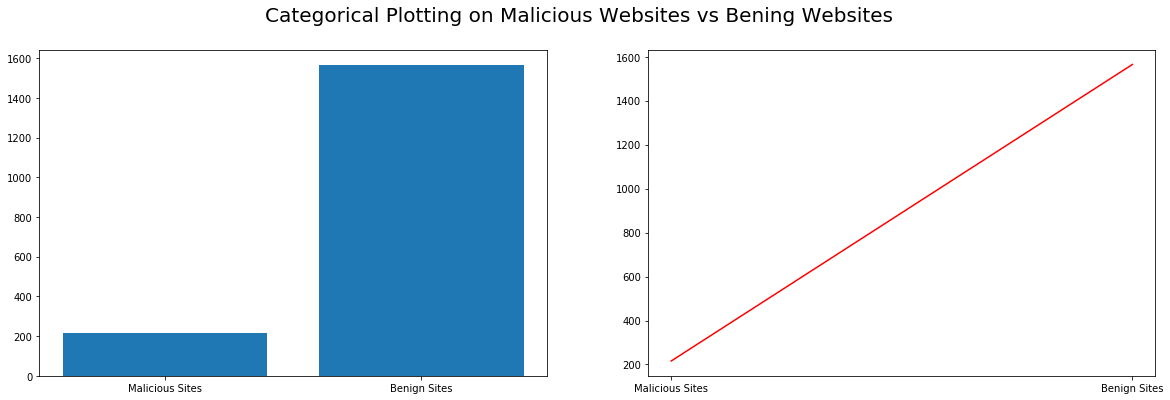

In [61]:
types = targetedVariables.Type
benignSites = list(filter(lambda x: x == 0, types))
maliciousSites = list(filter(lambda x: x == 1, types))

data = {'Malicious Sites': len(maliciousSites), 'Benign Sites': len(benignSites)}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1,2, figsize=(20,6), sharey=False)
axs[0].bar(names, values)
axs[1].plot(names, values, color="red")
fig.suptitle('Categorical Plotting on Malicious Websites vs Bening Websites', fontsize=20)